In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel("Road Accidents.xlsx")

In [4]:
print("Dataset Shape:", df.shape)
print("Dataset Info:")
df.info()

Dataset Shape: (2604, 15)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reference Number     2604 non-null   int64         
 1   Easting              2604 non-null   int64         
 2   Northing             2604 non-null   int64         
 3   Number of Vehicles   2604 non-null   int64         
 4   Accident Date        2604 non-null   datetime64[ns]
 5   Time (24hr)          2604 non-null   int64         
 6   1st Road Class       2604 non-null   object        
 7   Road Surface         2604 non-null   object        
 8   Lighting Conditions  2604 non-null   object        
 9   Weather Conditions   2604 non-null   object        
 10  Casualty Class       2604 non-null   object        
 11  Casualty Severity    2604 non-null   object        
 12  Sex of Casualty      2604 non-null   object       

In [5]:
df.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,110016014,443330,439205,2,2011-01-12,712,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62,Car
1,110016024,425059,433371,2,2011-01-12,830,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39,Car
2,110016533,420683,434373,1,2011-01-12,1215,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66,Car
3,110017112,431097,433000,1,2011-01-12,1735,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39,Goods vehicle 3.5 tonnes mgw and under
4,110020375,429523,433820,2,2011-01-12,1230,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29,Car


In [6]:
# Checking for missing values
df.isnull().sum()

,0
Reference Number,0
Easting,0
Northing,0
Number of Vehicles,0
Accident Date,0
Time (24hr),0
1st Road Class,0
Road Surface,0
Lighting Conditions,0
Weather Conditions,0


In [7]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 17


In [8]:
# Checking unique values per categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in 1st Road Class: 5
Unique values in Road Surface: 4
Unique values in Lighting Conditions: 5
Unique values in Weather Conditions: 7
Unique values in Casualty Class: 3
Unique values in Casualty Severity: 3
Unique values in Sex of Casualty: 2
Unique values in Type of Vehicle: 15


In [9]:
# Display summary statistics for numerical columns
df.describe()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),Age of Casualty
count,2.604000e+03,2604.000000,2604.000000,2604.000000,2604,2604.000000,2604.000000
mean,1.102817e+08,430127.497696,434243.245392,1.959677,2011-07-08 15:33:27.373271808,1406.221966,35.297235
min,1.100189e+07,415290.000000,424216.000000,1.000000,2011-01-12 00:00:00,5.000000,0.000000
25%,1.101720e+08,427136.500000,431754.500000,2.000000,2011-04-12 18:00:00,1044.500000,21.000000
50%,1.103125e+08,430098.000000,434223.000000,2.000000,2011-07-08 00:00:00,1455.000000,32.000000
75%,1.104574e+08,432513.000000,436165.000000,2.000000,2011-10-05 00:00:00,1750.000000,46.000000
max,1.200074e+08,444895.000000,449409.000000,8.000000,2011-12-31 00:00:00,2355.000000,95.000000
std,1.971720e+06,5118.276964,4383.146273,0.801163,NaN,509.065769,18.491683


In [10]:
df.describe(include='object')

,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Type of Vehicle
count,2604,2604,2604,2604,2604,2604,2604,2604
unique,5,4,5,7,3,3,2,15
top,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,Car
freq,1215,2013,1931,2283,1552,2313,1546,1796


In [11]:
#Remove Duplicate Rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicates}")
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 17
Number of duplicate rows after removal: 0


In [12]:
#Convert Date and Time to Useful Features
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Month'] = df['Accident Date'].dt.month
df['DayOfWeek'] = df['Accident Date'].dt.dayofweek
df['Hour'] = df['Time (24hr)'] // 100

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)

In [13]:
#Remove Unnecessary Columns
df.drop(columns=['Reference Number', 'Easting', 'Northing', 'Accident Date', 'Time (24hr)'], inplace=True)

In [15]:
print("Final dataset after Data Cleaning:")
df.head()

Final dataset after Data Cleaning:


,Number of Vehicles,1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Month,DayOfWeek,Hour,TimeOfDay
0,2,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62,Car,1,2,7,Morning
1,2,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39,Car,1,2,8,Morning
2,1,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66,Car,1,2,12,Afternoon
3,1,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39,Goods vehicle 3.5 tonnes mgw and under,1,2,17,Evening
4,2,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29,Car,1,2,12,Afternoon


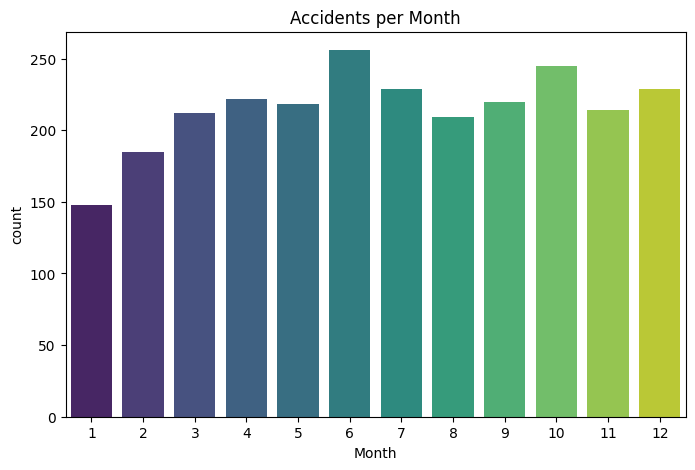

In [16]:
# Time-Based Trends
plt.figure(figsize=(8,5))
sns.countplot(x=df['Month'], palette='viridis')
plt.title("Accidents per Month")
plt.show()

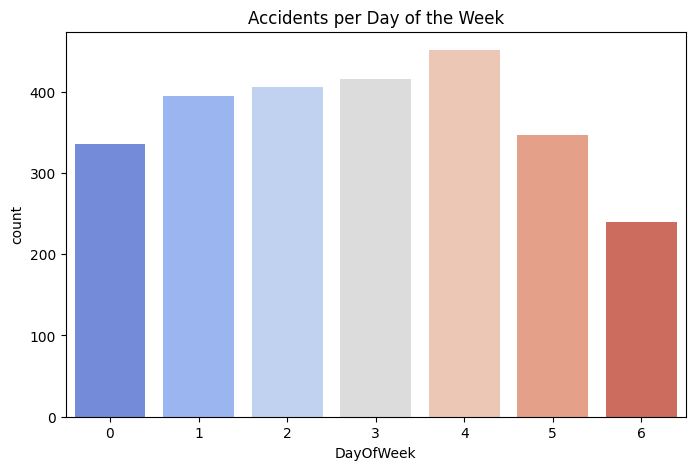

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['DayOfWeek'], palette='coolwarm')
plt.title("Accidents per Day of the Week")
plt.show()

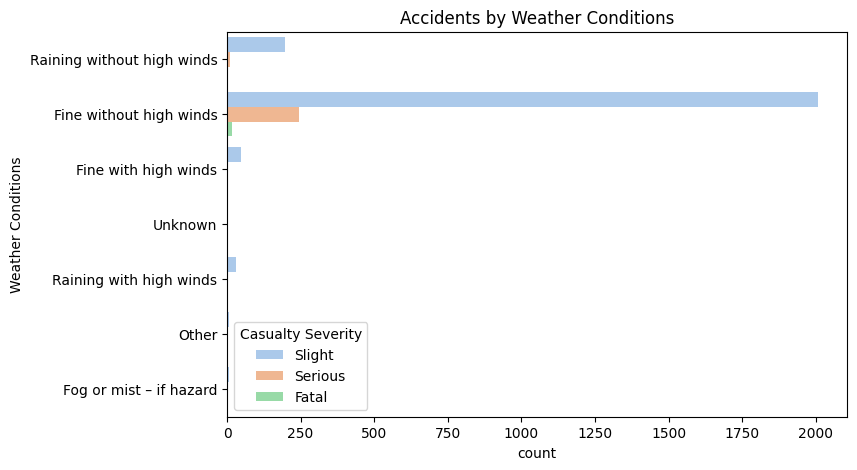

In [18]:
# Weather Impact
plt.figure(figsize=(8,5))
sns.countplot(y=df['Weather Conditions'], hue=df['Casualty Severity'], palette='pastel')
plt.title("Accidents by Weather Conditions")
plt.show()

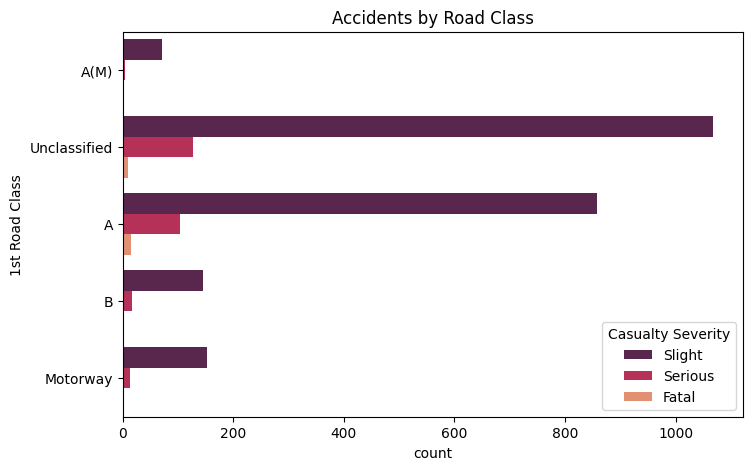

In [19]:
# Traffic & Road Conditions Impact
plt.figure(figsize=(8,5))
sns.countplot(y=df['1st Road Class'], hue=df['Casualty Severity'], palette='rocket')
plt.title("Accidents by Road Class")
plt.show()